In [1]:
#importing all the neccessary libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_path = "DATASET\DATASET\TEST"
test_path = "DATASET\DATASET\TRAIN"

In [3]:
#importing libraies 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from glob import  glob

In [4]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 1112/1112 [00:00<00:00, 1676.62it/s]


In [5]:
data.shape

(2513, 2)

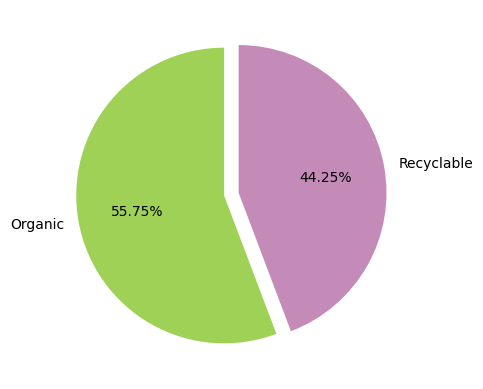

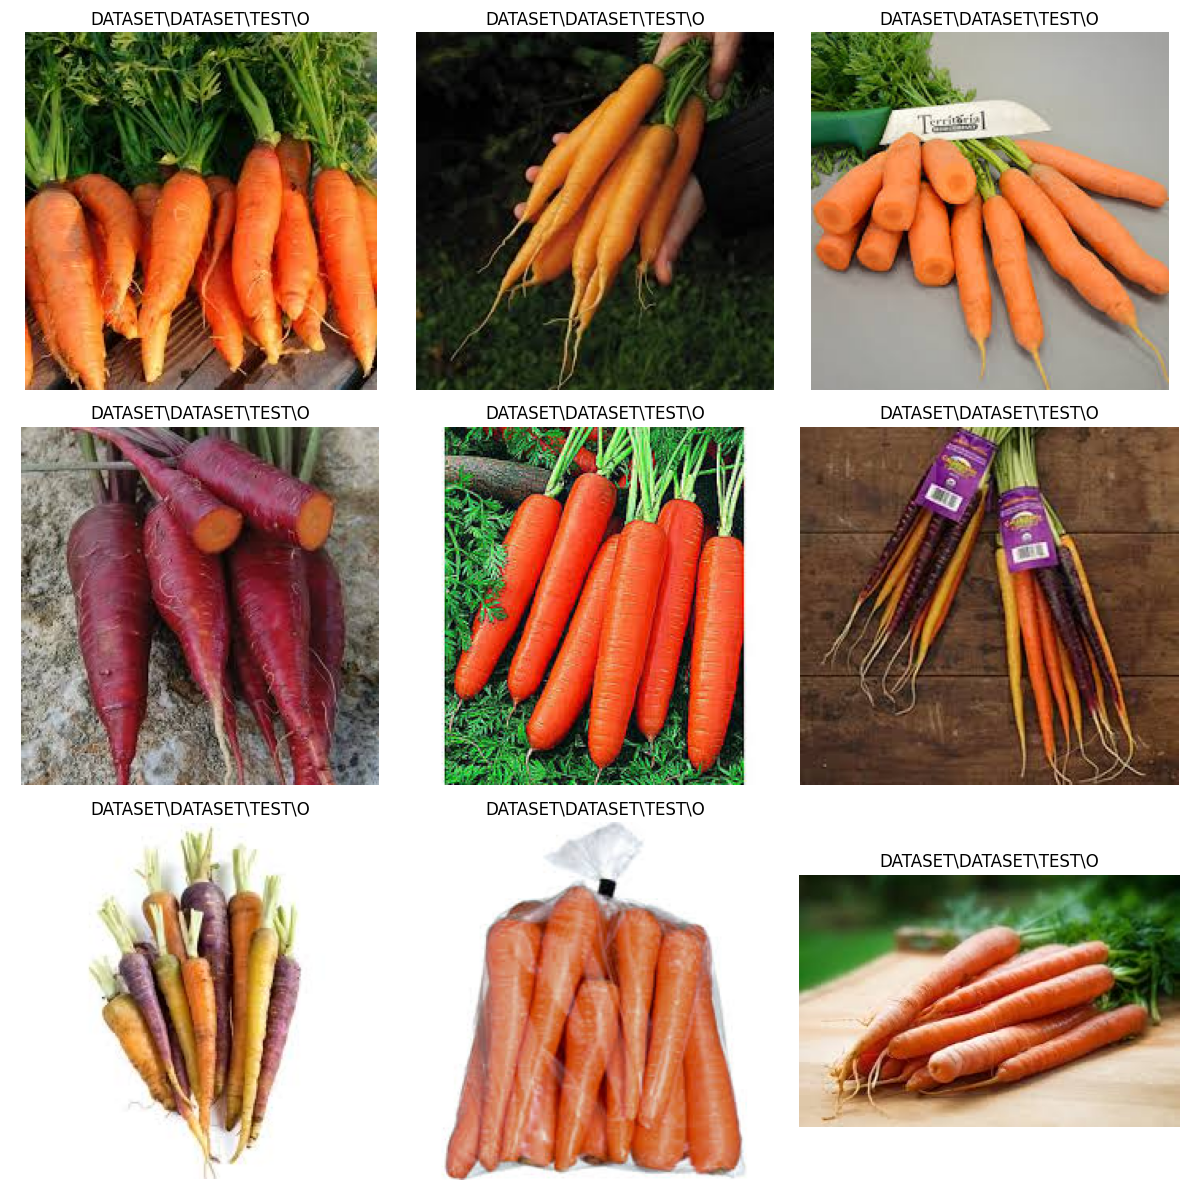

In [6]:
colors = ['#a0d157', '#c48bb8']
plt.pie(    data.label.value_counts(),labels=['Organic', 'Recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05, 0.05])
plt.show() 


# Displaying a sample of images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_data[i])
    plt.title(y_data[i], fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()



In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 2513 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [12]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
79/79 [==============================] - 161s 2s/step - loss: 0.6509 - accuracy: 0.6988 - val_loss: 0.4809 - val_accuracy: 0.7767
Epoch 2/10
79/79 [==============================] - 29s 368ms/step - loss: 0.3103 - accuracy: 0.8934 - val_loss: 0.5595 - val_accuracy: 0.7854
Epoch 3/10
79/79 [==============================] - 28s 362ms/step - loss: 0.2539 - accuracy: 0.9073 - val_loss: 0.7216 - val_accuracy: 0.7332
Epoch 4/10
79/79 [==============================] - 29s 370ms/step - loss: 0.2290 - accuracy: 0.9176 - val_loss: 0.8387 - val_accuracy: 0.7730
Epoch 5/10
79/79 [==============================] - 29s 374ms/step - loss: 0.1938 - accuracy: 0.9304 - val_loss: 0.7647 - val_accuracy: 0.7652
Epoch 6/10
79/79 [==============================] - 29s 365ms/step - loss: 0.1603 - accuracy: 0.9399 - val_loss: 1.0702 - val_accuracy: 0.7695
Epoch 7/10
79/79 [==============================] - 29s 368ms/step - loss: 0.1559 - accuracy: 0.9487 - val_loss: 1.1336 - val_accuracy: 0.7387
E